# 230968288 Dhanvithraj Shetty
Week 5 Q2/Q3


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

2025-08-25 15:31:58.446574: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-25 15:31:58.470138: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-25 15:31:58.827611: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('google_stock.csv')

df['date'] = pd.to_datetime(df['date'])

df = df.sort_values('date')

train_df = df[df['date'] < '2020-01-01']
test_df = df[(df['date'] >= '2020-01-01') & (df['date'] <= '2021-12-31')]


In [3]:
features = ['adjOpen', 'adjHigh', 'adjLow', 'adjVolume']
target = 'adjClose'

In [4]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(train_df[features])
y_train = scaler_y.fit_transform(train_df[[target]])

X_test = scaler_X.transform(test_df[features])
y_test = scaler_y.transform(test_df[[target]])


In [5]:
 def create_sequences(X, y, time_steps=36):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)


In [6]:
time_steps = 36
X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)


In [7]:
model = Sequential([
    layers.SimpleRNN(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    layers.Dropout(0.2),  # Dropout to reduce overfitting
    layers.SimpleRNN(30),
    layers.Dropout(0.2),
    layers.Dense(1) 
])

2025-08-25 15:32:05.630905: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-25 15:32:05.645657: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-25 15:32:05.645792: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [8]:
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_seq, y_train_seq,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


2025-08-25 15:32:08.962111: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2025-08-25 15:32:08.969435: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f4cac01f270 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-08-25 15:32:08.969448: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-08-25 15:32:08.972431: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-08-25 15:32:09.055326: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2025-08-25 15:32:09.112727: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

25/25 [==============================] - 2s 19ms/step - loss: 0.3862 - accuracy: 0.0000e+00 - val_loss: 0.0146 - val_accuracy: 0.0116
Epoch 2/100
25/25 [==============================] - 0s 13ms/step - loss: 0.1500 - accuracy: 0.0000e+00 - val_loss: 0.0062 - val_accuracy: 0.0116
Epoch 3/100
25/25 [==============================] - 0s 14ms/step - loss: 0.1035 - accuracy: 0.0000e+00 - val_loss: 0.0060 - val_accuracy: 0.0116
Epoch 4/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0714 - accuracy: 0.0000e+00 - val_loss: 0.0066 - val_accuracy: 0.0116
Epoch 5/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0564 - accuracy: 0.0000e+00 - val_loss: 0.0084 - val_accuracy: 0.0116
Epoch 6/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0452 - accuracy: 0.0000e+00 - val_loss: 0.0065 - val_accuracy: 0.0116
Epoch 7/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0419 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accurac

In [9]:
y_pred_scaled = model.predict(X_test_seq)

y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_test_seq)

mse = mean_squared_error(y_actual, y_pred)
mape = mean_absolute_percentage_error(y_actual, y_pred)

print(f"Test MSE: {mse}")
print(f"Test MAPE: {mape*100:.2f}%")

11/11 [==============================] - 0s 3ms/step
Test MSE: 97065.58143638386
Test MAPE: 12.15%


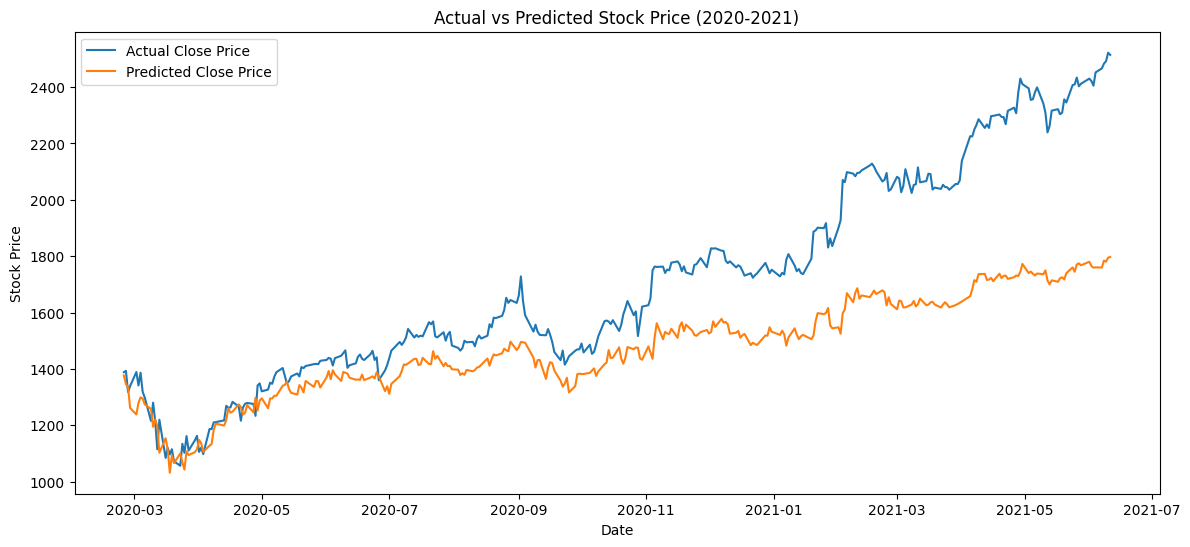

In [10]:
plt.figure(figsize=(14, 6))
plt.plot(test_df['date'][time_steps:].values, y_actual, label='Actual Close Price')
plt.plot(test_df['date'][time_steps:].values, y_pred, label='Predicted Close Price')
plt.title('Actual vs Predicted Stock Price (2020-2021)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [2]:
features = ['open', 'high', 'low', 'volume']
target = 'close'